# Diabetes Dataset Analysis
This notebook explores the Pima Indians Diabetes dataset. The objective is to analyze missing data and prepare the dataset for predictive modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load and Inspect the diabetes Dataset

In [2]:
csv_path = "../data/diabetes.csv"
data_diabetes = pd.read_csv(csv_path, sep=";")

data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10,115,0,0,0,35.3,0.134,29,0
1,7,100,0,0,0,30.0,0.484,32,1
2,7,105,0,0,0,0.0,0.305,24,0
3,2,84,0,0,0,0.0,0.304,21,0
4,0,131,0,0,0,43.2,0.270,26,1


## 2. Analyze Missing Data (Zeros)

In [3]:
# Check zeros contains in these columns
columns_to_check_zeros = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count number of zeros in each columns
zero_counts = {col: (data_diabetes[col] == 0).sum() for col in columns_to_check_zeros}

# Percentages between the zeros data and len of data_diabetes
zero_percentages = {col: (count / len(data_diabetes)) * 100 for col, count in zero_counts.items()}

In [4]:
print("Number of zero in each columns : ")
print(zero_counts)

print("\n Zero percentages in each columns :")
print(zero_percentages)

Number of zero in each columns : 
{'Pregnancies': 111, 'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11}

 Zero percentages in each columns :
{'Pregnancies': 14.453125, 'Glucose': 0.6510416666666667, 'BloodPressure': 4.557291666666666, 'SkinThickness': 29.557291666666668, 'Insulin': 48.69791666666667, 'BMI': 1.4322916666666665}


## 3. Distribution of each variables with contains zero
### Objective
This step examines the distributions of variables with significant missing values (`Insulin`, `SkinThickness`, `Pregnancies`, and `BloodPressure`).  
`BMI` and `Glucose` are excluded due to their low proportion of missing values, which has minimal impact on the dataset.  

These visualizations will help us understand the nature of the missing values and decide the best imputation strategy (mean or median).

#### Plot distributions (excluding zeros)

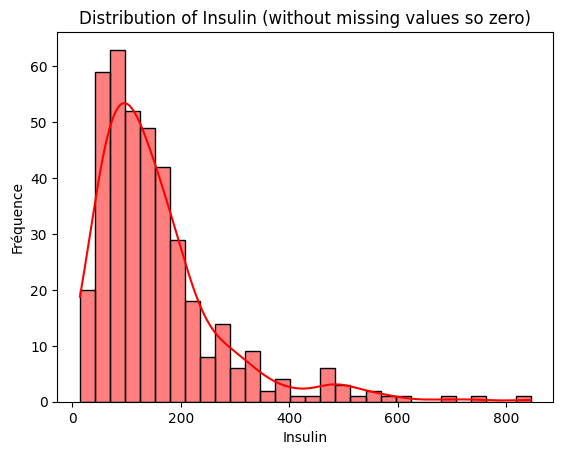

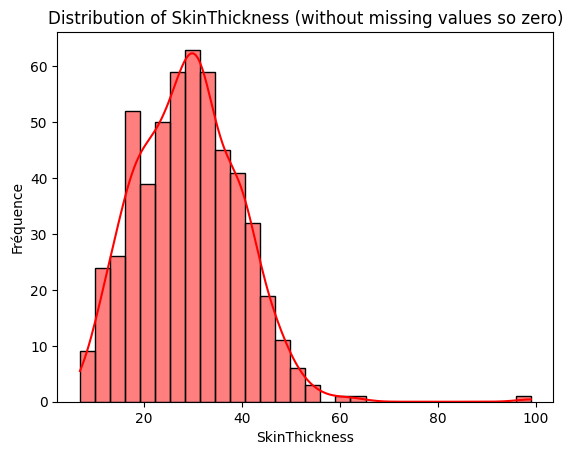

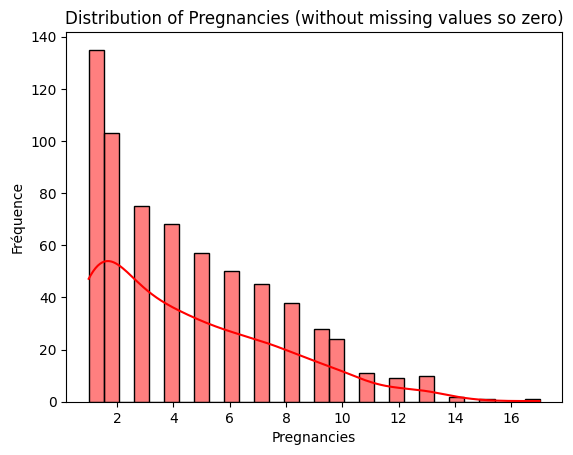

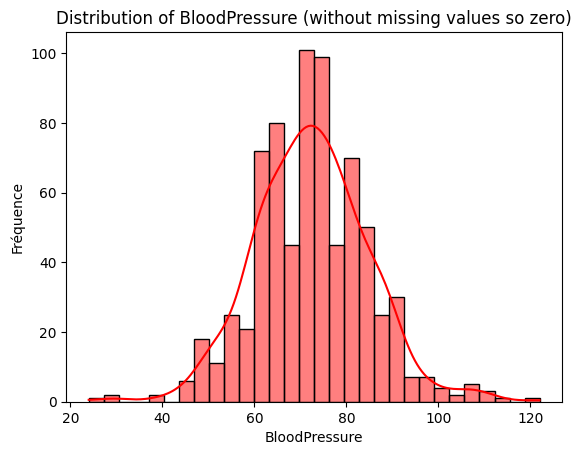

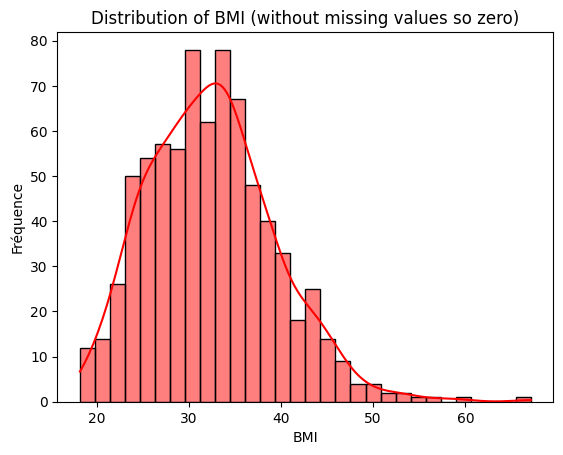

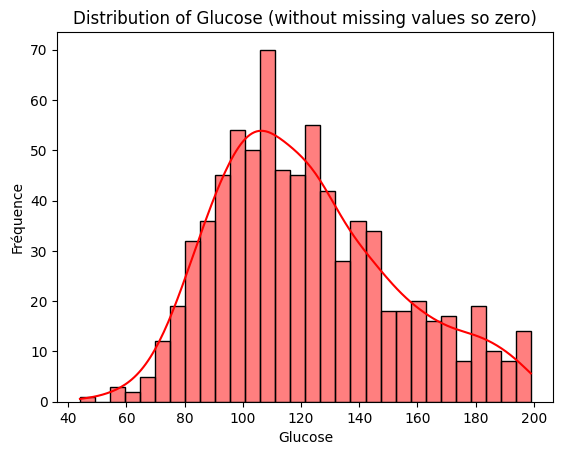

In [5]:
columns_to_visualize = ['Insulin', 'SkinThickness', 'Pregnancies', 'BloodPressure', 'BMI', 'Glucose'] 

# Loop through each column and plot its distribution (excluding zeros)
for column in columns_to_visualize:
    sns.histplot(data_diabetes[data_diabetes[column] > 0][column], bins=30, kde=True, color='red')
    plt.title(f"Distribution of {column} (without missing values so zero)")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.show()

After creating the distributions and analyse it, we can say that:

For **Insulin and Pregnancies**, these distributions are right-skewed, with many low values and some extreme high values. 
To avoid bias caused by extreme values, we will impute missing values using the **median**.

The **SkinThickness and BloodPressure** distributions are symmetric and centered around a mean. 
So the missing values will be imputed using the **mean**, as it best represents the central tendency.

This imputation step ensures a clean and unbiased dataset, ready for predictive modeling.

## 4. Data Preparation for Modelling
Before training the logistic regression model, we need to prepare the data:
1. Separate the features (`X`) from the target (`y`).
2. Split the dataset into training and test sets to evaluate the model.
3. Standardize the features to ensure consistent scaling across variables, as logistic regression is sensitive to variable scales.

In [11]:
# Separate the features (X) and the target Outcome (y)
X = data_diabetes.drop('Outcome', axis=1)
y = data_diabetes['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

# Divide the data (80% for training, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille des ensembles :")
print(f"Entraînement : {X_train.shape}")
print(f"Test : {X_test.shape}")

Taille des ensembles :
Entraînement : (614, 8)
Test : (154, 8)


In [13]:
# Standard of datas
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer la standardisation uniquement sur l'ensemble d'entraînement
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Appliquer la transformation sur l'ensemble de test
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [14]:
# Afficher un aperçu des données préparées
print(X_train.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.578815 -1.140334      -0.990548       0.136613 -0.011707 -0.217989   
1     0.004752  0.752260       0.662300       0.705506 -0.705848  0.860225   
2    -0.287032 -1.203420       0.042482      -1.317225 -0.705848 -1.455938   
3    -0.870599 -3.789965      -0.060821       0.895137 -0.705848 -0.005008   
4     0.880104 -0.194037      -0.267427      -1.317225 -0.705848 -0.617327   

   DiabetesPedigreeFunction       Age  
0                  1.590067 -1.066230  
1                  0.286279  0.303183  
2                 -0.233347 -0.723876  
3                 -0.233347 -0.980641  
4                  0.846845  0.046418  


Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        97
           1       0.70      0.54      0.61        57

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



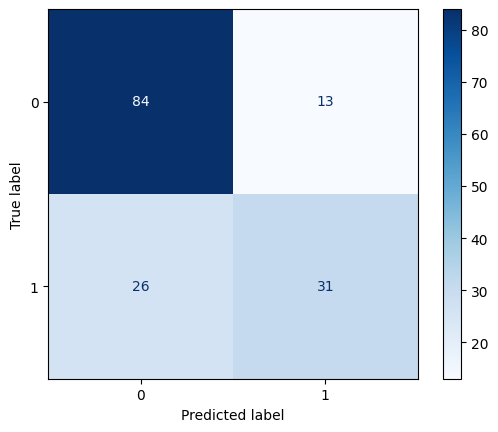

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Initialiser le modèle
model = LogisticRegression(max_iter=1000, random_state=42)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion (facultatif)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')


## 4. Mark Missing Values Instead of Imputing
To preserve the integrity of the data and avoid introducing artifacts into the distributions, we decided not to replace zeros in `Insulin`, `SkinThickness`. 
Instead, we created additional columns (`*_missing`) to indicate whether a value was originally missing (zero). This allows the model to take into account missingness without distorting the original distributions.


#### Add columns of variables for missing values (zeros)

In [6]:
data_diabetes['Insulin_missing'] = (data_diabetes['Insulin'] == 0).astype(int)
data_diabetes['SkinThickness_missing'] = (data_diabetes['SkinThickness'] == 0).astype(int)

## 5. Correlation between each variables and Outcome

In [7]:
correlation_variables_outcome = data_diabetes.corr()['Outcome'].sort_values(ascending=False)

# Show correlation
print("Correlation with Outcome:")
print(correlation_variables_outcome)

Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
SkinThickness_missing       0.052603
Insulin_missing             0.040934
Name: Outcome, dtype: float64
